In [37]:
from transformers import ElectraTokenizer
import time
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline
from statistics import mean, median, mode, stdev

start_time = time.time()
model_name_or_path = "monologg/koelectra-base-v3-discriminator"
tokenizer = ElectraTokenizer.from_pretrained(
        model_name_or_path,
        do_lower_case=False
    )
print(f"Load tokenizer time : {time.time()-start_time}\n\n")
INF = 10e9
# STD = 128
STD = 64

Load tokenizer time : 5.749130010604858




In [38]:
def check(FILE_PATH):
    global tokenizer, INF, STD
    print("*"*5+f" check_len : {FILE_PATH} "+"*"*5)
    count = 0
    lens = defaultdict(int)

    min_sen_len = INF
    max_sen_len = -1
    avg_sen_len = 0

    min_tok_len = INF
    max_tok_len = -1
    avg_tok_len = 0
    less_count, more_count, same_count = 0, 0, 0

    with open(FILE_PATH, 'r') as f :
        LINES = f.readlines()

    for line in LINES:
        sentence, tags = line.split('\t')

        len_sen = len(sentence)
        min_sen_len = min(min_sen_len, len_sen)
        max_sen_len = max(max_sen_len, len_sen)
        avg_sen_len += len_sen

        word_tokens = tokenizer.tokenize(sentence)
        len_tok = len(word_tokens)
        lens[len_tok] += 1
        if len_tok > STD :
            more_count += 1
        elif len_tok < STD :
            less_count += 1
        else :
            same_count += 1
        min_tok_len = min(min_tok_len, len_tok)
        max_tok_len = max(max_tok_len, len_tok)
        avg_tok_len += len_tok

        count +=1

    avg_sen_len /= count
    avg_tok_len /= count

    mean, mode, median, std = 0,0,0,0
    mean = avg_tok_len
    var = 0
    med_count, med_flag = 0, True
    max_freq = -1
    for key in sorted(lens.keys()) :
        val = lens[key]
        # 표준편차
        var += ((key-mean)**2) * (val)
        # 중앙값
        med_count += val
        if med_count >= int(count/2) and med_flag :
            median = key
            med_flag = False
        # 최빈값
        if max_freq < val :
            mode = key
            max_freq = val

    std = (var/count)**0.5

    print(f"min_sen_len : {min_sen_len}")
    print(f"max_sen_len : {max_sen_len}")
    print(f"avg_sen_len : {avg_sen_len:.3f}\n")
    print(f"min_tok_len : {min_tok_len}")
    print(f"max_tok_len : {max_tok_len}")
    print(f"avg_tok_len : {avg_tok_len:.3f}")
    print(f"more, same, less : {more_count, same_count, less_count}\n")
    print(f"mean, std : {mean:.3f}, {std:.3f}")
    print(f"median : {median}")
    print(f"mode, max_freq : {mode, max_freq}\n\n")
    # # 모든 키 값이 1번 씩만 나왔다고 가정하고 구한 평균, 중앙값, 최빈값, 표준편차
    # print(f"mean, median, mode, std : {mean(lens):.3f}, {median(lens):.3f}, {mode(lens):3f}, {stdev(lens):.3f}")
    # print(f"lens : {lens}\n\n")

    # plt.hist(lens, bins=len(lens), label=FILE_PATH)
    plt.bar(list(lens.keys()), lens.values())
    plt.show()

    return lens

***** check_len : ../data/train.tsv *****
min_sen_len : 1
max_sen_len : 1162
avg_sen_len : 50.857

min_tok_len : 1
max_tok_len : 752
avg_tok_len : 28.825
more, same, less : (4049, 216, 76735)

mean, std : 28.825, 19.380
median : 24
mode, max_freq : (20, 2710)




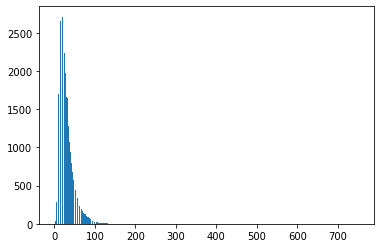

***** check_len : ../data/test.tsv *****
min_sen_len : 2
max_sen_len : 579
avg_sen_len : 51.236

min_tok_len : 1
max_tok_len : 335
avg_tok_len : 29.030
more, same, less : (471, 31, 8498)

mean, std : 29.030, 19.713
median : 24
mode, max_freq : (17, 314)




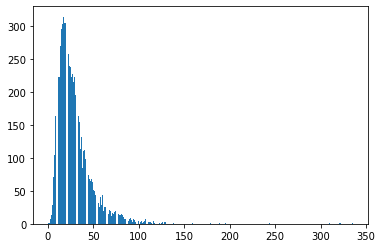

Execution time : 21.541839122772217


In [39]:
train_lens = check('../data/train.tsv')
test_lens = check('../data/test.tsv')
print(f"Execution time : {time.time()-start_time}")